In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv("attendance_marks.csv")   
print(data.head())


   Attendance  MSE  ESE
0          70   10   42
1          92    7   39
2          67    3   32
3          82   16   50
4          80    9   44


In [3]:
X = data.iloc[:, :-1]   
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
model = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    max_iter=1000,
    random_state=42
)


In [6]:
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [7]:
y_pred = model.predict(X_test)


In [8]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print(result.head())


    Actual  Predicted
4       44         49
63      43         50
18      46         50
0       42         49
28      55         64


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.13333333333333333


In [10]:
print(confusion_matrix(y_test, y_pred))


[[0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


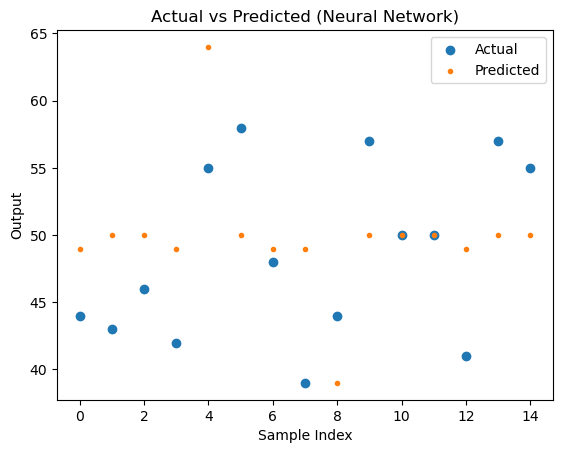

In [11]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test, label="Actual", marker='o')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", marker='.')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Output")
plt.title("Actual vs Predicted (Neural Network)")
plt.show()
